<a href="https://colab.research.google.com/github/aytakinn/Lumos/blob/master/video_action_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library


In [ ]:
import cv2
import glob
from skimage.transform import resize
import numpy as np
from IPython.display import clear_output

In [ ]:
sets=["bloopers/Test","bloopers/Train","bloopers/Validation"]

# Read from csv

In [ ]:
import pandas as pd
train= pd.read_csv("/content/bloopers/train.csv")

In [ ]:
zero = train[train.label==0]
one = train[train.label==1]


In [ ]:
import numpy as np
Y= np.array(list(zero.label)+list(one.label))
Y.shape

(464,)

# Capture videos and read frames from videos(RGB)

In [ ]:
vs=[]
fns=list(zero.file)+list(one.file)
for j  in range(len(fns)):
  if j%1==0:
    clear_output()  
    print(j)
  vcap=cv2.VideoCapture("bloopers/"+fns[j])
  success=True
  
  iml=[]
  c=0
  while success:
    try:
      success,image=vcap.read()
      c+=1
      if c%10==0:
        im=resize(image,(128,128)) 
        iml.append(im)
    except:
      pass
  vs.append(iml)

463


In [ ]:
videos=[]
for i in range(len(vs)):
  frames=[]
  for t in np.linspace(0, len(vs[i])-1, num=10):
    frames.append(vs[i][int(t)])
  videos.append(frames)
vl = np.array(videos)
vl.shape

(464, 10, 128, 128, 3)

In [ ]:
import joblib
joblib.dump(vl, "/content/vl_videos.pkl")  

['/content/vl_videos.pkl']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import joblib
vl=joblib.load("/content/vl_videos.pkl")  

# Split train and test dataset

In [ ]:
import numpy as np

xtr=[]
xte=[]

for i in range(186):
  xtr.append(vl[i])
for i in range(232,418):
  xtr.append(vl[i])
# for i in range(416,464):
#   xtr.append(vl[i])

for i in range(186,232):
  xte.append(vl[i])
for i in range(418,464):
  xte.append(vl[i])

xtr=np.array(xtr)
xte=np.array(xte)

In [ ]:
ytr=[]
yte=[]

for i in range(186):
  ytr.append(Y[i])
for i in range(232,418):
  ytr.append(Y[i])


for i in range(186,232):
  yte.append(Y[i])
for i in range(418,464):
  yte.append(Y[i])

ytr=np.array(ytr)
yte=np.array(yte)

In [ ]:
print("xtr shape: ", xtr.shape)
print("ytr shape: ", ytr.shape)
print("xte shape: ", xte.shape)
print("yte shape: ", yte.shape)

xtr shape:  (372, 10, 128, 128, 3)
ytr shape:  (372,)
xte shape:  (92, 10, 128, 128, 3)
yte shape:  (92,)


In [ ]:
import joblib
joblib.dump(((xtr,ytr),(xte,yte)), "/content/cv5_rgb_videos.pkl")  

['/content/cv5_rgb_videos.pkl']

# Capture videos and read frames from videos(Optical flow values)

In [ ]:
import cv2
import numpy as np
of=[]
fns=list(zero.file)+list(one.file)
for j  in range(len(fns)):
  if j%1==0:
    clear_output()  
    print(j)
  vc = cv2.VideoCapture("bloopers/"+fns[j])
  ret, first_frame = vc.read()
  success = True
  resize_dim = 128
  max_dim = max(first_frame.shape)
  scale = resize_dim/max_dim
  first_frame = cv2.resize(first_frame, None, fx=scale, fy=scale)
  prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
  mask = np.zeros_like(first_frame)
  mask[..., 1] = 255
  out = cv2.VideoWriter('/content/video.mp4',-1,1,(128, 128))
  c=0
  frame_count=0
  while frame_count<=10:
      ret, frame = vc.read()
      c+=1
      frame_count+=1
      if c%10==0:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, None, fx=scale, fy=scale)
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, pyr_scale = 0.5, levels = 5, winsize = 11, iterations = 5, poly_n = 5, poly_sigma = 1.1, flags = 0)
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        mask[..., 0] = angle * 180 / np.pi / 2
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
        frame = cv2.resize(frame, None, fx=scale, fy=scale)
        dense_flow = cv2.addWeighted(frame, 1,rgb, 2, 0)
        dense_flow=resize(dense_flow,(128,128))
        out.write(dense_flow)
        prev_gray = gray
  of.append(dense_flow)




463


In [ ]:
of_videos=[]
for i in range(len(of)):
  frames=[]
  for t in np.linspace(0, len(of[i])-1,num=10):
    frames.append(of[i])
    # print(t)
  of_videos.append(frames)
ol = np.array(of_videos)
ol.shape

(464, 10, 128, 128, 3)

In [ ]:
import joblib
joblib.dump(ol, "/content/ol_of_videos.pkl")  

['/content/ol_of_videos.pkl']

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import joblib
ol=joblib.load("/content/ol_of_videos.pkl")  

# Split train and test dataset(Optical flow)

In [ ]:
import numpy as np

xtr=[]
xte=[]

for i in range(186):
  xtr.append(ol[i])
for i in range(232,418):
  xtr.append(ol[i])

for i in range(186,232):
  xte.append(ol[i])
for i in range(418,464):
  xte.append(ol[i])

xtr=np.array(xtr)
xte=np.array(xte)

In [ ]:
ytr=[]
yte=[]

for i in range(186):
  ytr.append(Y[i])
for i in range(232,418):
  ytr.append(Y[i])

for i in range(186,232):
  yte.append(Y[i])
for i in range(418,464):
  yte.append(Y[i])

ytr=np.array(ytr)
yte=np.array(yte)

In [ ]:
print("xtr shape: ", xtr.shape)
print("ytr shape: ", ytr.shape)
print("xte shape: ", xte.shape)
print("yte shape: ", yte.shape)

xtr shape:  (372, 10, 128, 128, 3)
ytr shape:  (372,)
xte shape:  (92, 10, 128, 128, 3)
yte shape:  (92,)


In [ ]:
import joblib
joblib.dump(((xtr,ytr),(xte,yte)), "/content/cv5_of_videos.pkl")  

['/content/cv5_of_videos.pkl']

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import joblib
(xtr,ytr),(xte,yte)=joblib.load("/content/drive/MyDrive/cv5_of_videos.pkl")

In [ ]:
import joblib
(rgb_xtr,rgb_ytr),(rgb_xte,rgb_yte)=joblib.load("/content/drive/MyDrive/cv5_rgb_videos.pkl")

In [ ]:
print("xtr shape: ", xtr.shape)
print("ytr shape: ", ytr.shape)
print("xte shape: ", xte.shape)
print("yte shape: ", yte.shape)


print("rgb_xtr shape: ", rgb_xtr.shape)
print("rgb_ytr shape: ", rgb_ytr.shape)
print("rgb_xte shape: ", rgb_xte.shape)
print("rgb_yte shape: ", rgb_yte.shape)

xtr shape:  (372, 10, 128, 128, 3)
ytr shape:  (372,)
xte shape:  (92, 10, 128, 128, 3)
yte shape:  (92,)
rgb_xtr shape:  (372, 10, 128, 128, 3)
rgb_ytr shape:  (372,)
rgb_xte shape:  (92, 10, 128, 128, 3)
rgb_yte shape:  (92,)


In [ ]:
import numpy as np
xtr1 = np.concatenate([rgb_xtr,xtr],axis=1)
xte1 = np.concatenate([rgb_xte,xte],axis=1)


print(xtr1.shape)
print(xte1.shape)


(372, 20, 128, 128, 3)
(92, 20, 128, 128, 3)


# Convert labels into categorical value

In [ ]:
from tensorflow.keras.utils import to_categorical
ytr2 = to_categorical(ytr,2)
yte2 = to_categorical(yte,2)

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.metrics import *
import keras
from tensorflow.python.keras import backend as K
import tensorflow as tf
from keras import backend as k

# Create Model

In [ ]:
num_classes=2
ish=(20, 128, 128, 3)

def stack1(xs):
  xs=k.stack(xs, axis=1)
  s = k.shape(xs)
  return xs

xs=[]
a = Input(ish)
  
for i in range(0,20,2):
  x=Lambda(lambda x: x[:, i])(a)
  x=BatchNormalization()(x)
  x=Conv2D(filters=20, kernel_size=3, padding='same', activation='relu')(x)
  x=BatchNormalization()(x)
  
  x=MaxPooling2D()(x) # 64 56 20
  
  x=Conv2D(filters=30, kernel_size=3, padding='same', activation='relu')(x)
  x=BatchNormalization()(x)
  x=MaxPooling2D()(x) # 32 28 30
  
  x=Conv2D(filters=40, kernel_size=3, padding='same', activation='relu')(x)
  x=BatchNormalization()(x) 
  x=MaxPooling2D()(x) #  16 14 40

  x=Conv2D(filters=50, kernel_size=3, padding='same', activation='relu')(x)
  x=BatchNormalization()(x) 
  x=MaxPooling2D()(x) #  8 7 50

  x=Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
  xs.append(x)
  
  
t=Lambda(stack1)(xs)
t=Reshape((5,16,8,32))(t)
t=Conv3D(50,3,padding='same')(t)
x=BatchNormalization()(x)
target_shape=(5,16*8*50)
t=Reshape(target_shape)(t)
t=GRU(70, return_sequences=True)(t)
t=GRU(70)(t)
t=Dense(200,'relu')(t)
b=Dense(num_classes, activation='softmax')(t)

#########################################

model = Model(inputs=a, outputs=b)
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])

In [ ]:
model.fit(xtr1, ytr2, batch_size=10, epochs=30, validation_data=(xte1, yte2))

Epoch 1/30
38/38 [==============================] - 17s 129ms/step - loss: 0.6970 - accuracy: 0.5496 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/30
38/38 [==============================] - 3s 67ms/step - loss: 0.6161 - accuracy: 0.8163 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 3/30
38/38 [==============================] - 3s 66ms/step - loss: 0.5173 - accuracy: 0.8436 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 4/30
38/38 [==============================] - 3s 67ms/step - loss: 0.4648 - accuracy: 0.8828 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 5/30
38/38 [==============================] - 3s 67ms/step - loss: 0.3763 - accuracy: 0.9417 - val_loss: 0.6761 - val_accuracy: 0.5000
Epoch 6/30
38/38 [==============================] - 3s 67ms/step - loss: 0.3491 - accuracy: 0.9227 - val_loss: 0.6082 - val_accuracy: 0.7174
Epoch 7/30
38/38 [==============================] - 3s 68ms/step - loss: 0.3133 - accuracy: 0.9095 - val_loss: 0.5762 - val_accuracy: 0.6957
Epoch 8/30


# Confusion Matrix

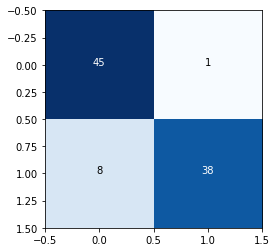

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

import matplotlib.pyplot as plt

pred = model.predict(xte1)

matrix = confusion_matrix(np.argmax(yte2,axis=1),np.argmax(pred,axis=1))
fmt = 'd'

thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
  plt.text(j, i, format(matrix[i, j], fmt),
  horizontalalignment="center",
  color="white" if matrix[i, j] > thresh else "black")

plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

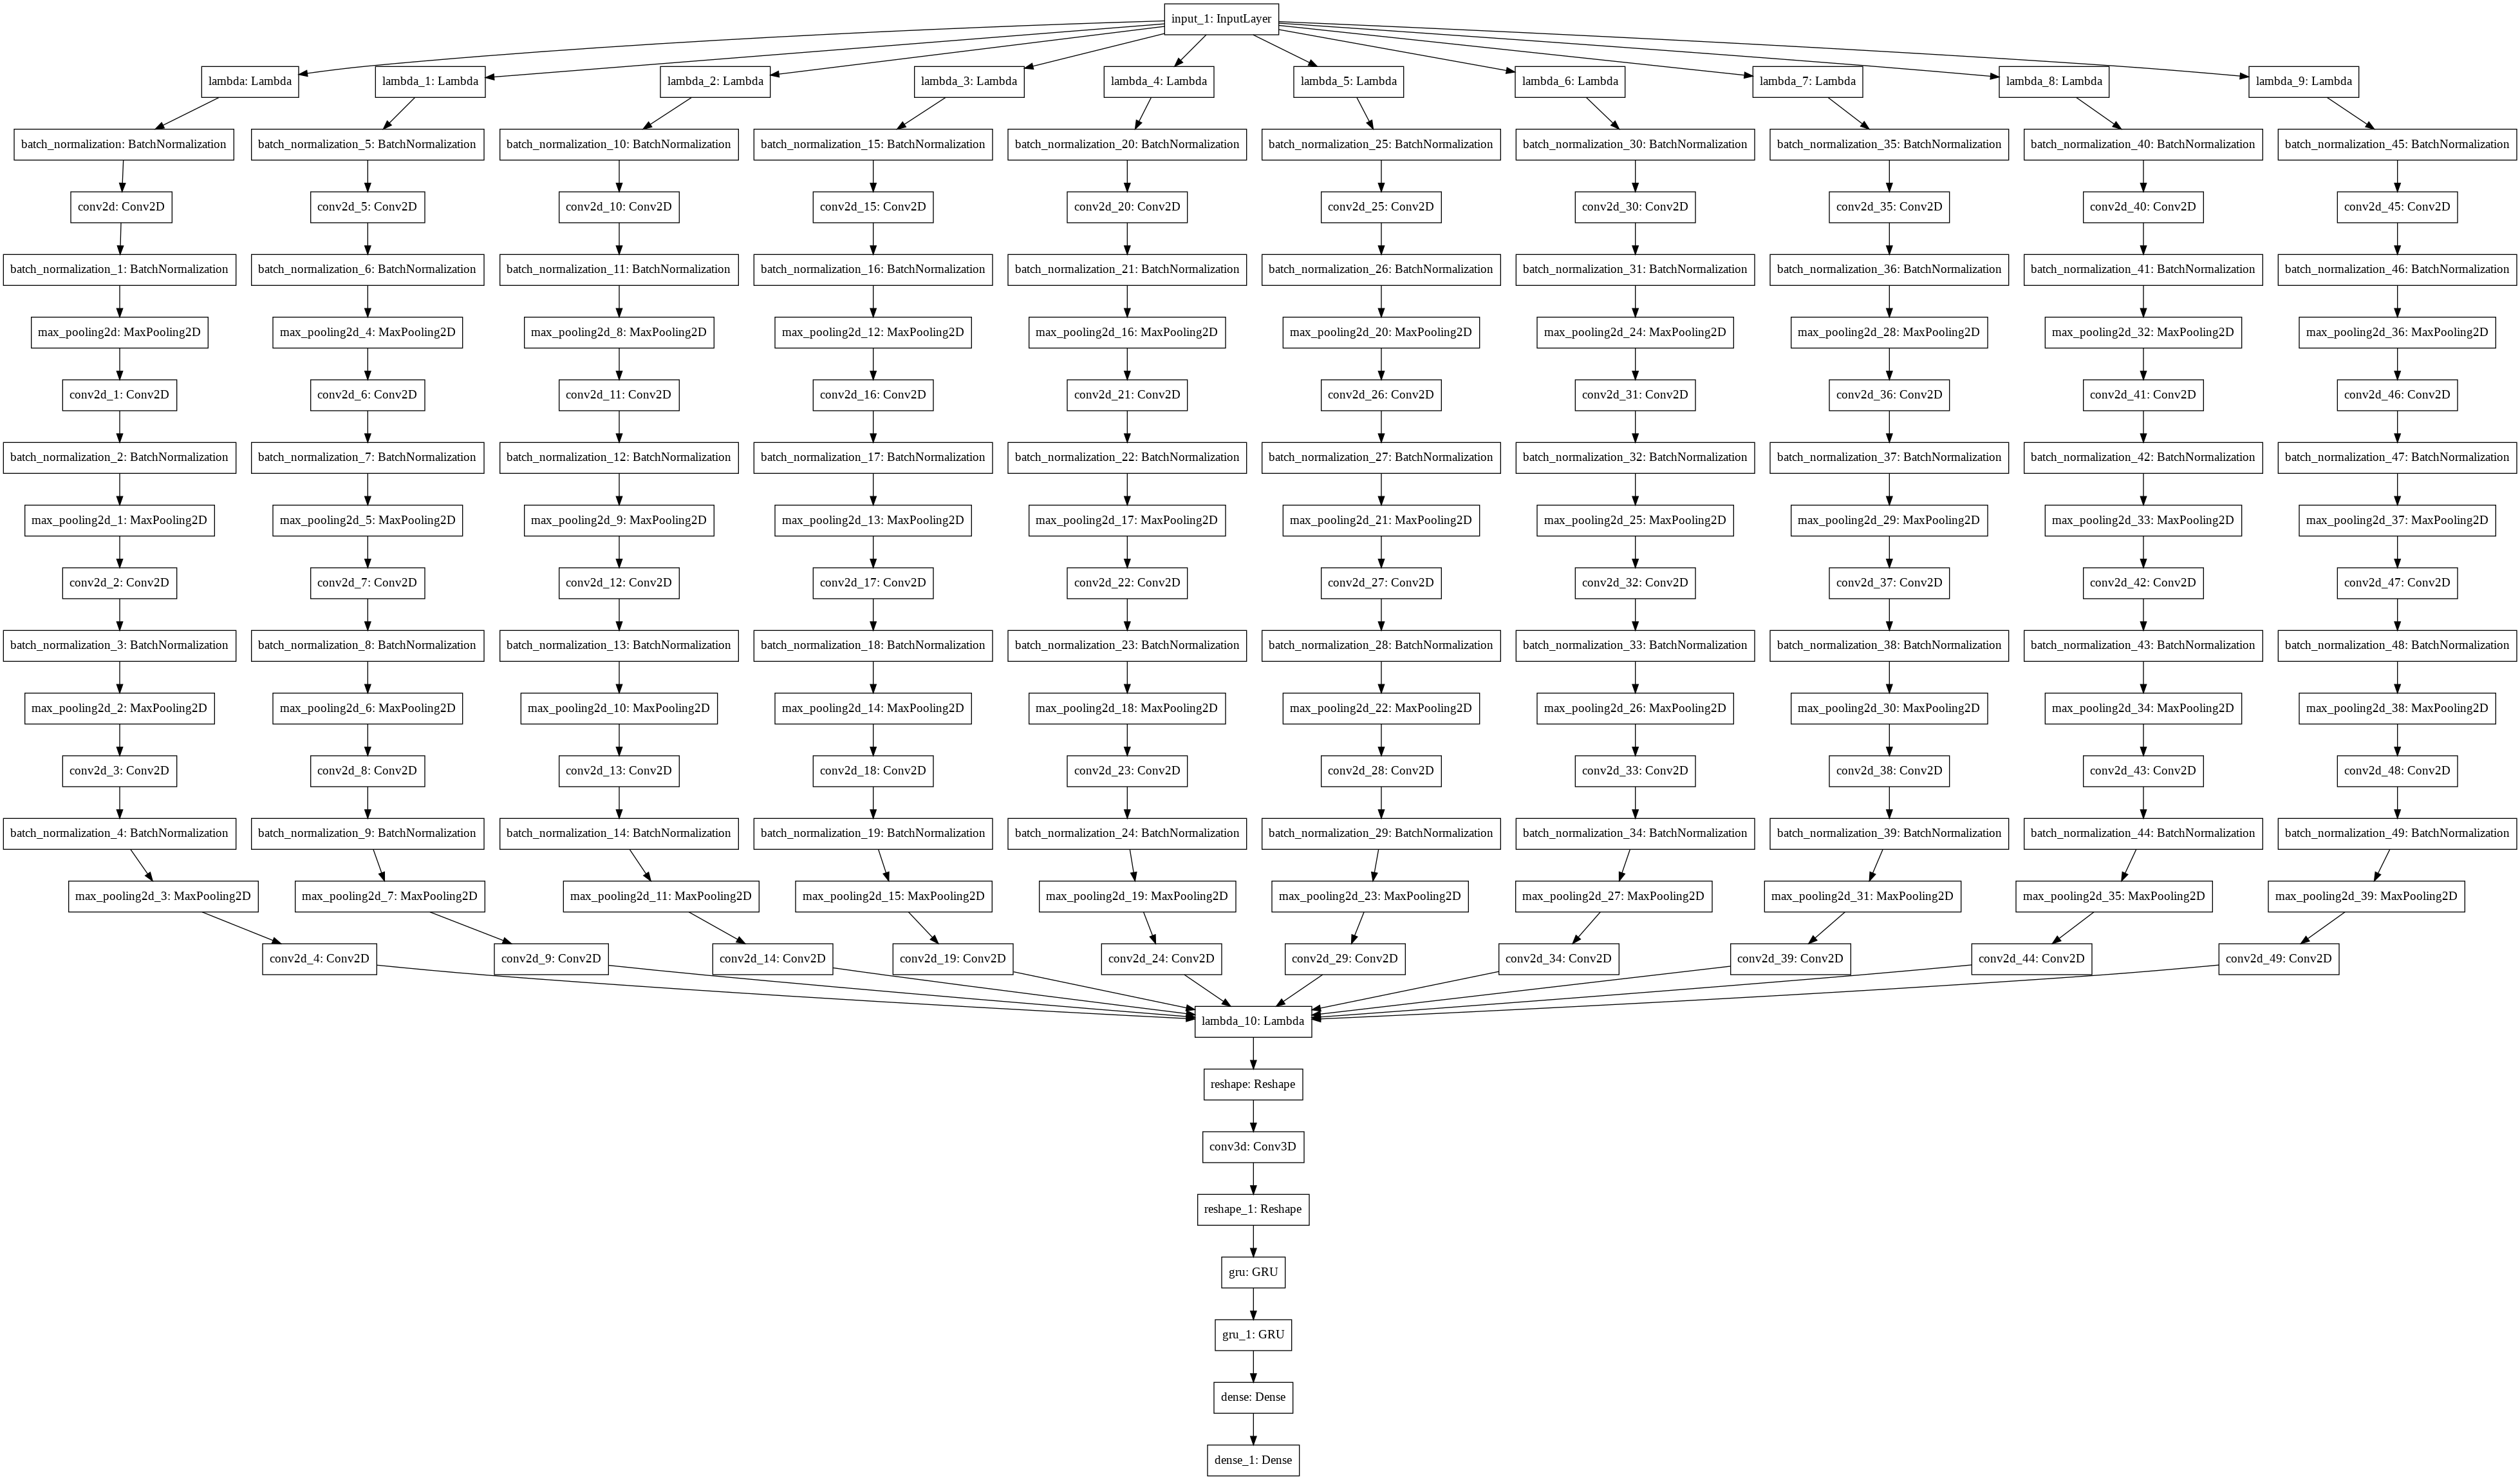

In [ ]:
 from tensorflow.keras.utils import plot_model
plot_model(model)